# Object Recognition

The objective of this lab is very simple, to recognize objects in images. You will be working with a well-known dataset called CIFAR-10.

You can learn more about this dataset and download it here:

https://www.cs.toronto.edu/~kriz/cifar.html

In the webpage above, they also included a few publications based on CIFAR-10 data, which showed some amazing accuracies. The worst network on the page (a shallow convolutional neural network) can classify images with rouhgly 75% accuracy.

# 1. Write a function to load data

The dataset webpage in the previous section also provide a simple way to load data from your harddrive using pickle. You may use their function for this exercise.

Construct two numpy arrays for train images and train labels from data_batch_1 to data_batch_5. Then, construct two numpy arrays for test images, and test labels from test batch file. The original image size is 32 x 32 x 3. You may flatten the arrays so the final arrays are of size 1 x 3072.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

folder = r"CIFAR-10"

features = []
labels = []

for i in range(1,6):
    with open(folder + '/data_batch_' + str(i), 'r+b') as file:
        batch = pickle.load(file, encoding='latin1')
    for j in range(len(batch['data'])):
        features.append(np.array(batch['data'][j]))
        labels.append(batch['labels'][j])

with open(folder + '/test_batch', mode='r+b') as file:
    batch = pickle.load(file, encoding='latin1')
for i in range(len(batch['data'])):
    features.append(np.array(batch['data'][i]))
    labels.append(batch['labels'][i])

# 0-49999 are train 
# 50000-59999 are test

features = np.array(features)
labels = np.array(labels)
input_shape = features[0].shape
num_data = len(features)

print(type(features))
print(features.shape)
print(labels.shape)
print(input_shape)
print(features[0:5])

<class 'numpy.ndarray'>
(60000, 3072)
(60000,)
(3072,)
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 [ 28  37  38 ...  28  37  46]
 [170 168 177 ...  82  78  80]]


# 2. Classify Dogs v.s. Cats

Let’s start simple by creating logistic regression model to classify images. We will select only two classes of images for this exercise.

1. From 50,000 train images and 10,000 test images, we want to reduce the data size. Write code to filter only dog images (label = 3) and cat images (label = 5).
2. Create a logistic regression model to classify cats and dogs. Report your accuracy.

In [ ]:
cat_label = 3
dog_label = 5

new_features = []
new_labels = []

for i in range(len(features)):
#     if(i == 50000):
#         print(len(new_features))
    if(labels[i] == cat_label or labels[i] == dog_label):
        new_features.append(features[i])
        new_labels.append(labels[i])

# 0-9999 are train 
# 10000-11999 are test

X_train = np.array(new_features[0:10000])
X_test = np.array(new_features[10000:12000])
Y_train = np.array(new_labels[0:10000])
Y_test = np.array(new_labels[10000:12000])

print(type(X_train))
print(len(X_train))
print(X_train[0].shape)
print(X_train[0:5])

In [ ]:
from sklearn.linear_model import LogisticRegression
import time

model_score = {
    "train_time": 0,
    "predict_time": 0,
    "acc": 0
}

model = LogisticRegression(random_state=13)

start_time = time.time()
model.fit(X_train, Y_train)
model_score["train_time"] = time.time() - start_time

print("LogisticRegression is train finish")

In [ ]:
start_time = time.time()
Y_Logistic = model.predict(X_test)
model_score["predict_time"] = time.time() - start_time

print("Logistic Regression predict fin")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

model_score["acc"] = accuracy_score(Y_test,Y_Logistic)
# model_score["precision"] = precision_score(Y_test, Y_Logistic, average='macro')
# model_score["recall"] = recall_score(Y_test, Y_Logistic, average='macro')

for item in model_score:
    print("Logistic Regression " + str(item) + ": " + str(model_score[item]))

# 3. The Real Challenge

The majority of your score for this lab will come from this real challenge. You are going to construct a neural network model to classify 10 classes of images from CIFAR-10 dataset. You will get half the credits for this one if you complete the assignment, and will get another half if you can exceed the target accuracy of 75%. (You may use any combination of sklearn, opencv, or tensorflow to do this exercise).

Design at least 3 variants of neural network models. Each model should have different architectures. (Do not vary just a few parameters, the architecture of the network must change in each model). In your notebook, explain your experiments in details and display the accuracy score for each experiment.

In [2]:
print(type(features))
print(features.shape)
print(labels.shape)
print(features[0].shape)
print(features[0:5])

<class 'numpy.ndarray'>
(60000, 3072)
(60000,)
(3072,)
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 [ 28  37  38 ...  28  37  46]
 [170 168 177 ...  82  78  80]]


In [3]:
features = features.reshape((len(features), 3, 32, 32)).transpose(0, 2, 3, 1)
    
print(features.shape)

(60000, 32, 32, 3)


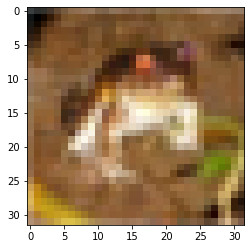

In [4]:
plt.imshow(features[0])
plt.show()

In [5]:
def preprocess_images(imgs):
  return imgs / 255.0

features = preprocess_images(features)

print(features[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [6]:
# 0-49999 are train 
# 50000-59999 are test

X_train = features[0:50000]
X_test = features[50000:60000]
Y_train = labels[0:50000]
Y_test = labels[50000:60000]

# X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
# X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
image_shape = X_train[0].shape

print(type(X_train))
print(X_train.shape)
print(image_shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
(32, 32, 3)


In [7]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import time
import os

print (tf.__version__)

2.3.0


In [8]:
batch_size = np.arange(5, 50, 5)
epoch = 12
record = {}

print(batch_size)
print(epoch)

[ 5 10 15 20 25 30 35 40 45]
12


In [9]:
def model1():
    model = keras.Sequential()

    # Layer 1: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=image_shape))

    # Layer 2: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 3: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'))

    # Layer 4: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 5: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu'))

    # Layer 6: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 7: Flatten Layer
    model.add(keras.layers.Flatten())

    # Layer 8: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(1024, activation='relu'))

    # Layer 9: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(512, activation='relu'))

    # Layer 10: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(256, activation='relu'))

    # Layer 11: Dense Layer (Output Layer)
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.build(input_shape)

    model.compile(optimizer= 'Adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return(model)

model = model1()
model.summary()
del model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 256)         131328    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [10]:
path = 'model1/model1_batchsize_'
record['model1'] = {}

for i in range(len(batch_size)):
    model = model1()
    
    checkpoint_path = path + str(batch_size[i]) + "_epoch_{epoch:02d}.h5"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)
    start_time = time.time()
    model.fit(X_train, Y_train, 
            batch_size=batch_size[i], 
            epochs=epoch, 
            validation_data=(X_test, Y_test), 
            callbacks=[cp_callback])
    record['model1'][batch_size[i]] = time.time() - start_time
    
    metrics = pd.DataFrame(model.history.history)

    filename = path + str(batch_size[i])

    metrics.to_csv(filename + '.csv')
#     model.save(filename + '.h5')  
    
    del model  # deletes the existing model

print('model1 finished')

PH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

Epoch 00001: saving model to model1\model1_batchsize_30_epoch_01.h5
1667/1667 [==============================] - 6s 3ms/step - loss: 1.4324 - accuracy: 0.4711 - val_loss: 1.1282 - val_accuracy: 0.6048
Epoch 2/12
1661/1667 [============================>.] - ETA: 0s - loss: 0.9707 - accuracy: 0.6604
Epoch 00002: saving model to model1\model1_batchsize_30_epoch_02.h5
1667/1667 [==============================] - 5s 3ms/step - loss: 0.9706 - accuracy: 0.6605 - val_loss: 0.9113 - val_accuracy: 0.6818
Epoch 3/12
1665/1667 [============================>.] - ETA: 0s - loss: 0.7775 - accuracy: 0.7304
Epoch 00003: saving model to model1\model1_batchsize_30_epoch_03.h5
1667/1667 [==============================] - 6s 3ms/step - loss: 0.7775 - accuracy: 0.7303 - val_loss: 0.8383 - val_accuracy: 0.7087
Epo

In [ ]:
def model2():
    model = keras.Sequential()

    # Layer 1: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=image_shape))

    # Layer 2: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 3: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'))

    # Layer 4: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 5: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu'))

    # Layer 6: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 7: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=512, kernel_size=(2,2), activation='relu'))

    # Layer 8: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 9: Flatten Layer
    model.add(keras.layers.Flatten())

    # Layer 10: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(256, activation='relu'))

    # Layer 11: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(128, activation='relu'))

    # Layer 12: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(56, activation='relu'))

    # Layer 13: Dense Layer (Output Layer)
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.build(input_shape)

    model.compile(optimizer= 'Adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = model2()
model.summary()
del model

In [ ]:
path = 'model2/model2_batchsize_'

for i in range(len(batch_size)):
    model = model2()
    
    checkpoint_path = path + str(batch_size[i]) + "_epoch_{epoch:02d}.h5"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)
    
    model.fit(X_train, Y_train, 
            batch_size=batch_size[i], 
            epochs=epoch, 
            validation_data=(X_test, Y_test), 
            callbacks=[cp_callback])
    metrics = pd.DataFrame(model.history.history)

    filename = path + str(batch_size[i])

    metrics.to_csv(filename + '.csv')
#     model.save(filename + '.h5')  
    
    del model  # deletes the existing model

print('model2 finished')

In [ ]:
def model3():
    model = keras.Sequential()

    # Layer 1: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=image_shape))

    # Layer 2: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 3: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'))

    # Layer 4: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 5: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu'))

    # Layer 6: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 7: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=512, kernel_size=(2,2), activation='relu'))

    # Layer 8: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 9: Flatten Layer
    model.add(keras.layers.Flatten())

    # Layer 10: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(256, activation='relu'))

    # Layer 11: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(128, activation='relu'))

    # Layer 12: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(128, activation='relu'))

    # Layer 13: Dense Layer (Output Layer)
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.build(input_shape)

    model.compile(optimizer= 'Adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = model3()
model.summary()
del model

In [ ]:
path = 'model3/model3_batchsize_'

for i in range(len(batch_size)):
    model = model3()
    
    checkpoint_path = path + str(batch_size[i]) + "_epoch_{epoch:02d}.h5"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)
    
    model.fit(X_train, Y_train, 
            batch_size=batch_size[i], 
            epochs=epoch, 
            validation_data=(X_test, Y_test), 
            callbacks=[cp_callback])
    metrics = pd.DataFrame(model.history.history)

    filename = path + str(batch_size[i])

    metrics.to_csv(filename + '.csv')
#     model.save(filename + '.h5')  
    
    del model  # deletes the existing model

print('model3 finished')

In [ ]:
def model4():
    model = keras.Sequential()

    # Layer 1: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=image_shape))

    # Layer 2: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 3: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'))

    # Layer 4: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 5: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu'))

    # Layer 6: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 7: Flatten Layer
    model.add(keras.layers.Flatten())
    
    # Layer 8: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(2048, activation='relu'))

    # Layer 9: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(1024, activation='relu'))

    # Layer 10: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(512, activation='relu'))

    # Layer 11: Dense Layer (Output Layer)
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.build(input_shape)

    model.compile(optimizer= 'Adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return(model)

model = model4()
model.summary()
del model

In [ ]:
path = 'model4/model4_batchsize_'

for i in range(len(batch_size)):
    model = model4()
    
    checkpoint_path = path + str(batch_size[i]) + "_epoch_{epoch:02d}.h5"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)
    
    model.fit(X_train, Y_train, 
            batch_size=batch_size[i], 
            epochs=epoch, 
            validation_data=(X_test, Y_test), 
            callbacks=[cp_callback])
    metrics = pd.DataFrame(model.history.history)

    filename = path + str(batch_size[i])

    metrics.to_csv(filename + '.csv')
#     model.save(filename + '.h5')  
    
    del model  # deletes the existing model
    
print('model4 finished')

In [ ]:
def model5():
    model = keras.Sequential()

    # Layer 1: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=image_shape))

    # Layer 2: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 3: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'))

    # Layer 4: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 5: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu'))

    # Layer 6: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 7: Flatten Layer
    model.add(keras.layers.Flatten())
    
    # Layer 8: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(2048, activation='relu'))

    # Layer 9: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(1024, activation='relu'))

    # Layer 10: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(512, activation='relu'))
    
    # Layer 11: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(256, activation='relu'))

    # Layer 12: Dense Layer (Output Layer)
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.build(input_shape)

    model.compile(optimizer= 'Adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return(model)

model5_1 = model5()
model5_1.summary()
del model5_1

In [ ]:
path = 'model5/model5_batchsize_'

for i in range(len(batch_size)):
    model = model5()
    
    checkpoint_path = path + str(batch_size[i]) + "_epoch_{epoch:02d}.h5"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)
    
    model.fit(X_train, Y_train, 
            batch_size=batch_size[i], 
            epochs=epoch, 
            validation_data=(X_test, Y_test), 
            callbacks=[cp_callback])
    metrics = pd.DataFrame(model.history.history)

    filename = path + str(batch_size[i])

    metrics.to_csv(filename + '.csv')
#     model.save(filename + '.h5')  
    
    del model  # deletes the existing model
    
print('model5 finished')

In [ ]:
def model6():
    model = keras.Sequential()

    # Layer 1: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=image_shape))

    # Layer 2: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 3: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'))

    # Layer 4: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 5: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'))

    # Layer 6: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 7: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu'))

    # Layer 8: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 9: Flatten Layer
    model.add(keras.layers.Flatten())

    # Layer 10: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(256, activation='relu'))

    # Layer 11: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(128, activation='relu'))

    # Layer 12: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(64, activation='relu'))

    # Layer 13: Dense Layer (Output Layer)
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.build(input_shape)

    model.compile(optimizer= 'Adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model6_1 = model6()
model6_1.summary()
del model6_1

In [ ]:
path = 'model6/model6_batchsize_'

for i in range(len(batch_size)):
    model = model6()
    
    checkpoint_path = path + str(batch_size[i]) + "_epoch_{epoch:02d}.h5"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)
    
    model.fit(X_train, Y_train, 
            batch_size=batch_size[i], 
            epochs=epoch, 
            validation_data=(X_test, Y_test), 
            callbacks=[cp_callback])
    metrics = pd.DataFrame(model.history.history)

    filename = path + str(batch_size[i])

    metrics.to_csv(filename + '.csv')
#     model.save(filename + '.h5')  
    
    del model  # deletes the existing model
    
print('model6 finished')

In [ ]:
def model7():
    model = keras.Sequential()

    # Layer 1: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=image_shape))

    # Layer 2: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 3: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'))

    # Layer 4: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 5: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'))

    # Layer 6: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 7: Flatten Layer
    model.add(keras.layers.Flatten())

    # Layer 8: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(256, activation='relu'))

    # Layer 9: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(128, activation='relu'))

    # Layer 10: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(64, activation='relu'))

    # Layer 11: Dense Layer (Output Layer)
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.build(input_shape)

    model.compile(optimizer= 'Adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model7_1 = model7()
model7_1.summary()
del model7_1

In [ ]:
path = 'model7/model7_batchsize_'

for i in range(len(batch_size)):
    model = model7()
    
    checkpoint_path = path + str(batch_size[i]) + "_epoch_{epoch:02d}.h5"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)
    
    model.fit(X_train, Y_train, 
            batch_size=batch_size[i], 
            epochs=epoch, 
            validation_data=(X_test, Y_test), 
            callbacks=[cp_callback])
    metrics = pd.DataFrame(model.history.history)

    filename = path + str(batch_size[i])

    metrics.to_csv(filename + '.csv')
#     model.save(filename + '.h5')  
    
    del model  # deletes the existing model

print('model7 finished')

In [ ]:
def model8():
    model = keras.Sequential()

    # Layer 1: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=image_shape))

    # Layer 2: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 3: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

    # Layer 4: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 5: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

    # Layer 6: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 7: Flatten Layer
    model.add(keras.layers.Flatten())

    # Layer 8: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(256, activation='relu'))

    # Layer 9: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(128, activation='relu'))

    # Layer 10: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(64, activation='relu'))

    # Layer 11: Dense Layer (Output Layer)
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.build(input_shape)
#     model.summary()

    model.compile(optimizer= 'Adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model8_1 = model8()
model8_1.summary()
del model8_1

In [ ]:
path = 'model8/model8_batchsize_'

for i in range(len(batch_size)):
    model = model8()
    
    checkpoint_path = path + str(batch_size[i]) + "_epoch_{epoch:02d}.h5"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)
    
    model.fit(X_train, Y_train, 
            batch_size=batch_size[i], 
            epochs=epoch, 
            validation_data=(X_test, Y_test), 
            callbacks=[cp_callback])
    metrics = pd.DataFrame(model.history.history)

    filename = path + str(batch_size[i])

    metrics.to_csv(filename + '.csv')
#     model.save(filename + '.h5')  
    
    del model  # deletes the existing model

print('model8 finished')

In [ ]:
def model9():
    model = keras.Sequential()

    # Layer 1: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=image_shape))

    # Layer 2: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 3: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

    # Layer 4: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 5: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

    # Layer 6: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 7: Flatten Layer
    model.add(keras.layers.Flatten())

    # Layer 8: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(128, activation='relu'))

    # Layer 9: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(64, activation='relu'))

    # Layer 10: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(32, activation='relu'))

    # Layer 11: Dense Layer (Output Layer)
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.build(input_shape)
#     model.summary()

    model.compile(optimizer= 'Adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model9_1 = model9()
model9_1.summary()
del model9_1

In [ ]:
path = 'model9/model9_batchsize_'

for i in range(len(batch_size)):
    model = model9()
    
    checkpoint_path = path + str(batch_size[i]) + "_epoch_{epoch:02d}.h5"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)
    
    model.fit(X_train, Y_train, 
            batch_size=batch_size[i], 
            epochs=epoch, 
            validation_data=(X_test, Y_test), 
            callbacks=[cp_callback])
    metrics = pd.DataFrame(model.history.history)

    filename = path + str(batch_size[i])

    metrics.to_csv(filename + '.csv')
#     model.save(filename + '.h5')  
    
    del model  # deletes the existing model

print('model9 finished')

In [ ]:
def model10():
    model = keras.Sequential()

    # Layer 1: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', input_shape=image_shape))

    # Layer 2: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 3: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'))

    # Layer 4: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 5: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'))

    # Layer 6: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 7: Convolutional Layer
    model.add(keras.layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu'))

    # Layer 8: Pooling Layer
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Layer 9: Flatten Layer
    model.add(keras.layers.Flatten())

    # Layer 10: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(128, activation='relu'))

    # Layer 11: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(64, activation='relu'))

    # Layer 12: Dense Layer (Hidden Layer)
    model.add(keras.layers.Dense(32, activation='relu'))

    # Layer 13: Dense Layer (Output Layer)
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.build(input_shape)

    model.compile(optimizer= 'Adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model10_1 = model10()
model10_1.summary()
del model10_1

In [ ]:
path = 'model10/model10_batchsize_'

for i in range(len(batch_size)):
    model = model10()
    
    checkpoint_path = path + str(batch_size[i]) + "_epoch_{epoch:02d}.h5"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)
    
    model.fit(X_train, Y_train, 
            batch_size=batch_size[i], 
            epochs=epoch, 
            validation_data=(X_test, Y_test), 
            callbacks=[cp_callback])
    metrics = pd.DataFrame(model.history.history)

    filename = path + str(batch_size[i])

    metrics.to_csv(filename + '.csv')
#     model.save(filename + '.h5')  
    
    del model  # deletes the existing model

print('model10 finished')

In [ ]:
path_model = 'model1/model1_batchsize_'

best = []
for i in range(len(batch_size)):
    data = pd.read_csv(path_model + str(batch_size[i]) + '.csv')
    df = pd.DataFrame(data, columns= ['val_acc'])

    acc = [a for b in df.values.tolist() for a in b]
    epoch = acc.index(max(acc)) + 1
    acc = max(acc)
    best.append([batch_size[i], epoch, acc])
    print("model1 batch size {} at epoch {} accuracy: {:5.2f}%".format(batch_size[i], epoch, 100*acc))

et = []
for i in range(len(batch_size)):
    et.append(best[i][2])
t = et.index(max(et))

print("\nbest of model1 batch size {} at epoch {} accuracy: {:5.2f}%".format(best[t][0], best[t][1], 100*best[t][2]))

In [ ]:
path_model = 'model2/model2_batchsize_'

best = []
for i in range(len(batch_size)):
    data = pd.read_csv(path_model + str(batch_size[i]) + '.csv')
    df = pd.DataFrame(data, columns= ['val_acc'])

    acc = [a for b in df.values.tolist() for a in b]
    epoch = acc.index(max(acc)) + 1
    acc = max(acc)
    best.append([batch_size[i], epoch, acc])
    print("model2 batch size {} at epoch {} accuracy: {:5.2f}%".format(batch_size[i], epoch, 100*acc))

et = []
for i in range(len(batch_size)):
    et.append(best[i][2])
t = et.index(max(et))

print("\nbest of model2 batch size {} at epoch {} accuracy: {:5.2f}%".format(best[t][0], best[t][1], 100*best[t][2]))
best1 = [2, best[t][0], best[t][1]]

In [ ]:
path_model = 'model3/model3_batchsize_'

best = []
for i in range(len(batch_size)):
    data = pd.read_csv(path_model + str(batch_size[i]) + '.csv')
    df = pd.DataFrame(data, columns= ['val_acc'])

    acc = [a for b in df.values.tolist() for a in b]
    epoch = acc.index(max(acc)) + 1
    acc = max(acc)
    best.append([batch_size[i], epoch, acc])
    print("model3 batch size {} at epoch {} accuracy: {:5.2f}%".format(batch_size[i], epoch, 100*acc))

et = []
for i in range(len(batch_size)):
    et.append(best[i][2])
t = et.index(max(et))

print("\nbest of model3 batch size {} at epoch {} accuracy: {:5.2f}%".format(best[t][0], best[t][1], 100*best[t][2]))

In [ ]:
path_model = 'model4/model4_batchsize_'

best = []
for i in range(len(batch_size)):
    data = pd.read_csv(path_model + str(batch_size[i]) + '.csv')
    df = pd.DataFrame(data, columns= ['val_acc'])

    acc = [a for b in df.values.tolist() for a in b]
    epoch = acc.index(max(acc)) + 1
    acc = max(acc)
    best.append([batch_size[i], epoch, acc])
    print("model4 batch size {} at epoch {} accuracy: {:5.2f}%".format(batch_size[i], epoch, 100*acc))

et = []
for i in range(len(batch_size)):
    et.append(best[i][2])
t = et.index(max(et))

print("\nbest of model4 batch size {} at epoch {} accuracy: {:5.2f}%".format(best[t][0], best[t][1], 100*best[t][2]))
best2 = [4, best[t][0], best[t][1]]

In [ ]:
path_model = 'model5/model5_batchsize_'

best = []
for i in range(len(batch_size)):
    data = pd.read_csv(path_model + str(batch_size[i]) + '.csv')
    df = pd.DataFrame(data, columns= ['val_acc'])

    acc = [a for b in df.values.tolist() for a in b]
    epoch = acc.index(max(acc)) + 1
    acc = max(acc)
    best.append([batch_size[i], epoch, acc])
    print("model5 batch size {} at epoch {} accuracy: {:5.2f}%".format(batch_size[i], epoch, 100*acc))

et = []
for i in range(len(batch_size)):
    et.append(best[i][2])
t = et.index(max(et))

print("\nbest of model5 batch size {} at epoch {} accuracy: {:5.2f}%".format(best[t][0], best[t][1], 100*best[t][2]))
best3 = [5, best[t][0], best[t][1]]

In [ ]:
path_model = 'model6/model6_batchsize_'

best = []
for i in range(len(batch_size)):
    data = pd.read_csv(path_model + str(batch_size[i]) + '.csv')
    df = pd.DataFrame(data, columns= ['val_acc'])

    acc = [a for b in df.values.tolist() for a in b]
    epoch = acc.index(max(acc)) + 1
    acc = max(acc)
    best.append([batch_size[i], epoch, acc])
    print("model6 batch size {} at epoch {} accuracy: {:5.2f}%".format(batch_size[i], epoch, 100*acc))

et = []
for i in range(len(batch_size)):
    et.append(best[i][2])
t = et.index(max(et))

print("\nbest of model6 batch size {} at epoch {} accuracy: {:5.2f}%".format(best[t][0], best[t][1], 100*best[t][2]))

In [ ]:
path_model = 'model7/model7_batchsize_'

best = []
for i in range(len(batch_size)):
    data = pd.read_csv(path_model + str(batch_size[i]) + '.csv')
    df = pd.DataFrame(data, columns= ['val_acc'])

    acc = [a for b in df.values.tolist() for a in b]
    epoch = acc.index(max(acc)) + 1
    acc = max(acc)
    best.append([batch_size[i], epoch, acc])
    print("model7 batch size {} at epoch {} accuracy: {:5.2f}%".format(batch_size[i], epoch, 100*acc))

et = []
for i in range(len(batch_size)):
    et.append(best[i][2])
t = et.index(max(et))

print("\nbest of model7 batch size {} at epoch {} accuracy: {:5.2f}%".format(best[t][0], best[t][1], 100*best[t][2]))

In [ ]:
path_model = 'model8/model8_batchsize_'

best = []
for i in range(len(batch_size)):
    data = pd.read_csv(path_model + str(batch_size[i]) + '.csv')
    df = pd.DataFrame(data, columns= ['val_acc'])

    acc = [a for b in df.values.tolist() for a in b]
    epoch = acc.index(max(acc)) + 1
    acc = max(acc)
    best.append([batch_size[i], epoch, acc])
    print("model8 batch size {} at epoch {} accuracy: {:5.2f}%".format(batch_size[i], epoch, 100*acc))

et = []
for i in range(len(batch_size)):
    et.append(best[i][2])
t = et.index(max(et))

print("\nbest of model8 batch size {} at epoch {} accuracy: {:5.2f}%".format(best[t][0], best[t][1], 100*best[t][2]))

In [ ]:
path_model = 'model9/model9_batchsize_'

best = []
for i in range(len(batch_size)):
    data = pd.read_csv(path_model + str(batch_size[i]) + '.csv')
    df = pd.DataFrame(data, columns= ['val_acc'])

    acc = [a for b in df.values.tolist() for a in b]
    epoch = acc.index(max(acc)) + 1
    acc = max(acc)
    best.append([batch_size[i], epoch, acc])
    print("model9 batch size {} at epoch {} accuracy: {:5.2f}%".format(batch_size[i], epoch, 100*acc))

et = []
for i in range(len(batch_size)):
    et.append(best[i][2])
t = et.index(max(et))

print("\nbest of model9 batch size {} at epoch {} accuracy: {:5.2f}%".format(best[t][0], best[t][1], 100*best[t][2]))

In [ ]:
path_model = 'model10/model10_batchsize_'

best = []
for i in range(len(batch_size)):
    data = pd.read_csv(path_model + str(batch_size[i]) + '.csv')
    df = pd.DataFrame(data, columns= ['val_acc'])

    acc = [a for b in df.values.tolist() for a in b]
    epoch = acc.index(max(acc)) + 1
    acc = max(acc)
    best.append([batch_size[i], epoch, acc])
    print("model10 batch size {} at epoch {} accuracy: {:5.2f}%".format(batch_size[i], epoch, 100*acc))

et = []
for i in range(len(batch_size)):
    et.append(best[i][2])
t = et.index(max(et))

print("\nbest of model10 batch size {} at epoch {} accuracy: {:5.2f}%".format(best[t][0], best[t][1], 100*best[t][2]))

In [ ]:
print(best1, best2, best3)

In [ ]:
best_model1 = model2()

if best_epoch > 9:
    best_model1.load_weights('model' + str(best1[0]) + '/model' + str(best1[0])
                             + '_batchsize_' + str(best1[1]) 
                             + '_epoch_' + str(best1[2]) + '.h5')

else:
    best_model1.load_weights('model' + str(best1[0]) + '/model' + str(best1[0]) 
                             + '_batchsize_' + str(best1[1]) 
                             + '_epoch_0' + str(best1[2]) + '.h5')
best_model1.summary()
_, acc = best_model1.evaluate(X_test, Y_test)
Y1_pre = best_model1.predict(X_test)

print("\nbest model1 batch size {} at epoch {} accuracy: {:5.2f}%".format(best1[1], best1[2], 100*acc))

In [ ]:
best_model2 = model4()

if best_epoch > 9:
    best_model2.load_weights('model' + str(best2[0]) + '/model' + str(best2[0])
                             + '_batchsize_' + str(best2[1]) 
                             + '_epoch_' + str(best2[2]) + '.h5')

else:
    best_model2.load_weights('model' + str(best2[0]) + '/model' + str(best2[0]) 
                             + '_batchsize_' + str(best2[1]) 
                             + '_epoch_0' + str(best2[2]) + '.h5')
best_model2.summary()
_, acc = best_model2.evaluate(X_test, Y_test)
Y2_pre = best_model2.predict(X_test)

print("\nbest model2 batch size {} at epoch {} accuracy: {:5.2f}%".format(best2[1], best2[2], 100*acc))

In [ ]:
best_model3 = model5()

if best_epoch > 9:
    best_model3.load_weights('model' + str(best3[0]) + '/model' + str(best3[0])
                             + '_batchsize_' + str(best3[1]) 
                             + '_epoch_' + str(best3[2]) + '.h5')

else:
    best_model3.load_weights('model' + str(best3[0]) + '/model' + str(best3[0]) 
                             + '_batchsize_' + str(best3[1]) 
                             + '_epoch_0' + str(best3[2]) + '.h5')
best_model3.summary()
_, acc = best_model3.evaluate(X_test, Y_test)
Y3_pre = best_model3.predict(X_test)

print("\nbest model3 batch size {} at epoch {} accuracy: {:5.2f}%".format(best3[1], best3[2], 100*acc))

In [ ]:
def confusionMatrix(Y_test, Y_predict):
    Y_ = []

    for i in range(len(Y_predict)):
        Y_.append(Y_predict[i].tolist().index(max(Y_predict[i])))

    np.array(Y_)

    return tf.confusion_matrix(labels = Y_test, 
                                  predictions = Y_, 
                                  num_classes = 10)

In [ ]:
sess = tf.Session()
with sess.as_default():
    print("Confusion Matrix of Best Model1\n")
    print(sess.run(confusionMatrix(Y_test, Y1_pre)))
    
    print("\n\nConfusion Matrix of Best Model2\n")
    print(sess.run(confusionMatrix(Y_test, Y2_pre)))
    
    print("\n\nConfusion Matrix of Best Model3")
    print(sess.run(confusionMatrix(Y_test, Y3_pre)))